## 02DEMO: Training

In [1]:
import sys
sys.path.append("../../deepyeast/")

import yaml

from config_yml import ExperimentOptions
import tensorflow as tf
%load_ext autoreload
%autoreload 2

2023-01-02 21:55:04.949400: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 21:55:05.103983: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-02 21:55:09.024586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /dcsrsoft/spack/arolle/v1.0/spack/opt/spack/linux-rhel8-zen/gcc-8.4.1/gcc-10.4.0-7fjdev7tbifqfonsjwlqmr6qcnza2ezu/lib64:/dcsrsoft/spack/arolle/v1.0/spack/opt/spack/linux-rhel8-zen/gcc-8.4.1/gcc-10.4.0-7fjdev7tbif

In [2]:
with open("../configs/config_wl.yaml", 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
configs = ExperimentOptions(config)

## Converts your data to sharded TFRecord file format

In [7]:
from data.build_cell_data import _convert_dataset

In [10]:
_convert_dataset("../../../data/set7/", "train", "../../../data/set7/tf/", True)

../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_01_00.png
4032
max: 18637
../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_02_03.png
4053
max: 18644
../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_03_01.png
4040
max: 18927
../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_04_04.png
4050
max: 18343
../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_05_05.png
4029
max: 16815
../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_06_01.png
4041
max: 18449
../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_07_07.png
4041
max: 18315
../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_08_05.png
4032
max: 15982
../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_09_01.png
4031
max: 18389
../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_10_04.png
4051
max: 17442
../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_11_04.png
4066
max: 18152
../../../data/set7/images/train/1_100_2x2/3306_REF_DIC_12_06.png
4049
max: 16011
../../../data/set7/images/tr

### Check dataset

In [12]:
from trainer import runner_utils

In [13]:
celldataset = runner_utils.create_dataset(configs.train_dataset_options,
    is_training=True,                      
    only_semantic_annotations=False)

2023-01-02 21:32:13.920535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 21:32:14.492615: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 714 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0


get randowm scale: Tensor("strided_slice:0", shape=(), dtype=float32)
00000 (None, None, 1)
1111 (None, None, 1)
2222 (513, 513, 1)
33333 (513, 513, 1)


In [15]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['image', 'semantic_gt', 'semantic_loss_weight', 'is_crowd_gt', 'panoptic_gt', 'center_loss_weight', 'regression_loss_weight', 'instance_center_gt', 'instance_regression_gt']
(32, 513, 513, 1) 65535.0 0.0 int32


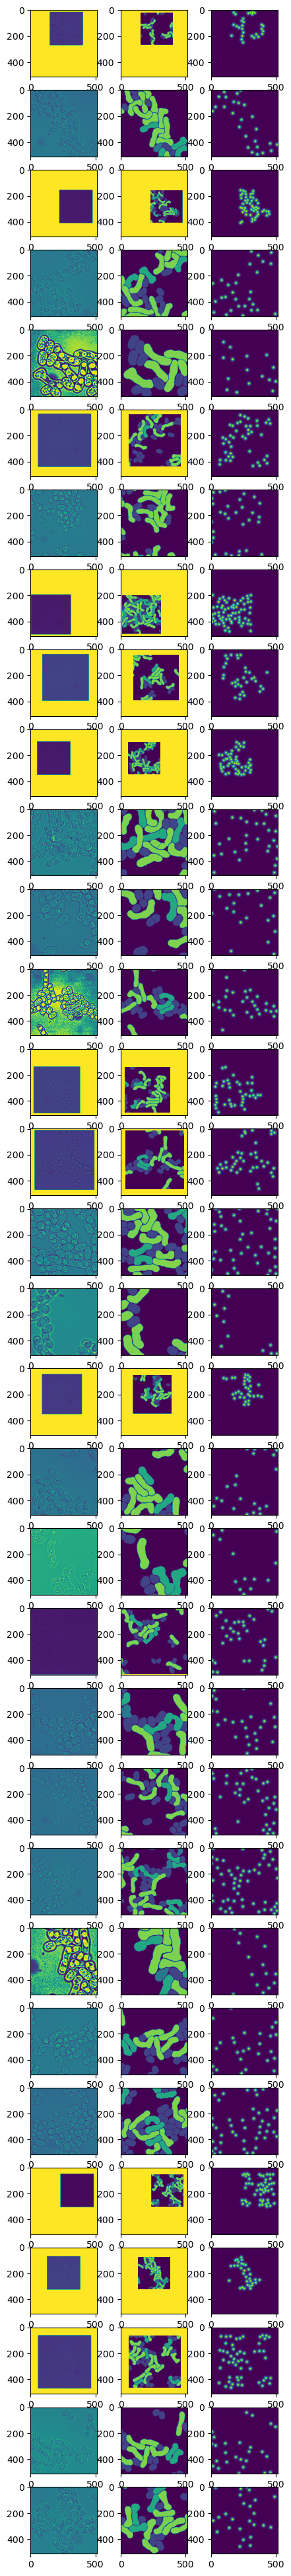

In [17]:
for example in tfds.as_numpy(celldataset.take(1)):  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
    print(list(example.keys()))
    image = example["image"]
    gt = example["panoptic_gt"]
    ct = example["instance_center_gt"]
  # label = example["label"]
    print(image.shape,image.max(),image.min(), gt.dtype)

fig,axs = plt.subplots(image.shape[0], 3, figsize=(5, 50))
for i in range(0,image.shape[0]):
    axs[i,0].imshow(image[i,:,:,0])
    axs[i,1].imshow(gt[i,:,:],vmax=5000)
    axs[i,2].imshow(ct[i,:,:])
    # print(image[i,:,:,0].max(),image[i,:,:,0].min())

## Training

In [3]:
from trainer.train import DeepCellModule

In [4]:
mode = 'train'
model_dir = "../../model_dir/"
num_gpus=1

In [5]:
selfmodel = DeepCellModule(mode, model_dir, configs, num_gpus)

2023-01-02 21:55:29.168061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 21:55:29.711629: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38224 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0


DEEPLAB INIT
DEEPLAB INIT (33, 33)
Setting pooling size to %s (33, 33)
get randowm scale: Tensor("strided_slice:0", shape=(), dtype=float32)
00000 (None, None, 1)
1111 (None, None, 1)
2222 (513, 513, 1)
33333 (513, 513, 1)
restoring or initializing model...
restored model from ../../model_dir/ckpt-60000.
restored from checkpoint: ../../model_dir/ckpt-60000


In [6]:
selfmodel.train()

train | step:  60000 | training until step 80000...
create training loop!
self._train_iter is None
run _train_iter, numsteps: <tensorflow.python.distribute.input_lib.DistributedIterator object at 0x7f4bbc214820> tf.Tensor(100, shape=(), dtype=int32)
norm
norm


2023-01-02 21:59:28.199480: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2023-01-02 21:59:34.860557: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-02 21:59:35.256886: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-02 21:59:48.982561: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 520.03MiB (rounded to 545292288)requested by op while/body/_1/DeepLab/PanopticDeepLab/semantic_decoder/fusion_conv2/conv1_bn_act/pointwise/conv/Conv2D
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-01-02 21:59:48.982766: I tensorflow/core/common_runtime/bfc_allocator.cc:1033]

ResourceExhaustedError: Graph execution error:

Detected at node 'DeepLab/PanopticDeepLab/semantic_decoder/fusion_conv2/conv1_bn_act/pointwise/conv/Conv2D' defined at (most recent call last):
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/23166282/ipykernel_920534/2227311753.py", line 1, in <module>
      selfmodel.train()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/trainer/train.py", line 107, in train
      self.controller.train(steps=self.config.trainer_options.solver_options.training_number_of_steps)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/orbit/controller.py", line 240, in train
      self._train_n_steps(num_steps)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/orbit/controller.py", line 439, in _train_n_steps
      train_output = self.trainer.train(num_steps_tensor)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/orbit/standard_runner.py", line 149, in train
      self._train_loop_fn(self._train_iter, num_steps)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/orbit/utils/loop_fns.py", line 116, in loop_fn
      for _ in tf.range(num_steps):
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/orbit/utils/loop_fns.py", line 120, in loop_fn
      step_fn(iterator)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/trainer/trainer.py", line 219, in train_step
      self._strategy.run(step_fn, args=(next(iterator),))
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/trainer/trainer.py", line 216, in step_fn
      self._train_step(inputs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/trainer/trainer.py", line 228, in _train_step
      outputs = self._model(inputs[common.IMAGE], training=True)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/deeplab.py", line 140, in call
      if training:
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/deeplab.py", line 141, in call
      result_dict = self._decoder(
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/decoder/panoptic_deeplab.py", line 424, in call
      semantic_features = self._semantic_decoder(features, training=training)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/decoder/panoptic_deeplab.py", line 152, in call
      for i in range(len(self._low_level_feature_names)):
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/decoder/panoptic_deeplab.py", line 180, in call
      combined_features = getattr(self, current_fusion_conv_name)(
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/layers/convolutions.py", line 559, in call
      for index in range(self._num_layers):
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/layers/convolutions.py", line 562, in call
      x = getattr(self, current_name)(x, training=training)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/layers/convolutions.py", line 471, in call
      return self._pointwise(x, training=training)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/layers/convolutions.py", line 287, in call
      x = self._conv(x)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'DeepLab/PanopticDeepLab/semantic_decoder/fusion_conv2/conv1_bn_act/pointwise/conv/Conv2D'
Detected at node 'DeepLab/PanopticDeepLab/semantic_decoder/fusion_conv2/conv1_bn_act/pointwise/conv/Conv2D' defined at (most recent call last):
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/23166282/ipykernel_920534/2227311753.py", line 1, in <module>
      selfmodel.train()
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/trainer/train.py", line 107, in train
      self.controller.train(steps=self.config.trainer_options.solver_options.training_number_of_steps)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/orbit/controller.py", line 240, in train
      self._train_n_steps(num_steps)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/orbit/controller.py", line 439, in _train_n_steps
      train_output = self.trainer.train(num_steps_tensor)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/orbit/standard_runner.py", line 149, in train
      self._train_loop_fn(self._train_iter, num_steps)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/orbit/utils/loop_fns.py", line 116, in loop_fn
      for _ in tf.range(num_steps):
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/orbit/utils/loop_fns.py", line 120, in loop_fn
      step_fn(iterator)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/trainer/trainer.py", line 219, in train_step
      self._strategy.run(step_fn, args=(next(iterator),))
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/trainer/trainer.py", line 216, in step_fn
      self._train_step(inputs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/trainer/trainer.py", line 228, in _train_step
      outputs = self._model(inputs[common.IMAGE], training=True)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/deeplab.py", line 140, in call
      if training:
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/deeplab.py", line 141, in call
      result_dict = self._decoder(
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/decoder/panoptic_deeplab.py", line 424, in call
      semantic_features = self._semantic_decoder(features, training=training)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/decoder/panoptic_deeplab.py", line 152, in call
      for i in range(len(self._low_level_feature_names)):
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/decoder/panoptic_deeplab.py", line 180, in call
      combined_features = getattr(self, current_fusion_conv_name)(
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/layers/convolutions.py", line 559, in call
      for index in range(self._num_layers):
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/layers/convolutions.py", line 562, in call
      x = getattr(self, current_name)(x, training=training)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/layers/convolutions.py", line 471, in call
      return self._pointwise(x, training=training)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/project/deepyeast/example/../../deepyeast/model/layers/convolutions.py", line 287, in call
      x = self._conv(x)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/work/FAC/FBM/DMF/smartin/cellfusion/wanlan/miniconda3/envs/tf210/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'DeepLab/PanopticDeepLab/semantic_decoder/fusion_conv2/conv1_bn_act/pointwise/conv/Conv2D'
2 root error(s) found.
  (0) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[32,129,129,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node DeepLab/PanopticDeepLab/semantic_decoder/fusion_conv2/conv1_bn_act/pointwise/conv/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[while/merge/_3792/_13]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) RESOURCE_EXHAUSTED:  OOM when allocating tensor with shape[32,129,129,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node DeepLab/PanopticDeepLab/semantic_decoder/fusion_conv2/conv1_bn_act/pointwise/conv/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_loop_fn_250947]

## evaluate

In [ ]:
selfmodel.evaluate(steps=-1)